In [1]:
import torch
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from torch_geometric.data import Data
from torch_geometric.transforms import ToSLIC
import torch
#torch transform bilinear interpolation
#torch transform resize
from torch.nn.functional import interpolate
from skimage.segmentation import slic
from skimage import graph as sk_graph
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.measure import regionprops
import networkx as nx
import torch_geometric as pyg
import skimage as sk
image_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_maps.npy"
label_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_shortest_paths.npy"
matrix_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_vertex_weights.npy" 

trial_index = 33
image = np.load(image_path)[trial_index]
label = np.load(label_path)[trial_index]


In [2]:
data_dir = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/"
data_suffix = "maps"
train_prefix = "train"


train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
train_weights = np.load(os.path.join(data_dir, train_prefix + "_vertex_weights.npy"))
train_labels = np.load(os.path.join(data_dir, train_prefix + "_shortest_paths.npy"))

#images = train_inputs.transpose(0,2,3,1).astype(np.uint8)
images = train_inputs
idx = 44
im = images[idx]
label = train_labels[idx]
weights = train_weights[idx]


In [3]:

image = im
def path_to_graph(centroids, label, sensitivity=0.25,
                  resize_shape=(96, 96)):
    """"""
    label = sk.transform.resize(label, resize_shape)
    centroid_is_path = np.zeros(len(centroids)) # One-hot encoding if a centroid is part of the path or not
    centroid = centroids.numpy()

    for row in range(len(label)):
        for column in range(len(label)):
            if label[column, row] > np.max(label) - (sensitivity*np.max(label)): # Choose the 30% brightest spots on the label only
                dists = [np.linalg.norm([row, column] - c) for c in centroid] 

                centroid_is_path[np.argmin(dists)] = 1
    
    return torch.tensor(centroid_is_path)
def bilinear_interpolation(image, nodes):
    values = []
    height, width = image.shape
    
    for node in nodes:
        x, y = node
        
        i, j = int(x), int(y)
        alpha, beta = x - i, y - j
        
        if i < 0 or i >= height - 1 or j < 0 or j >= width - 1:
            values.append(np.nan)  # Node outside the image bounds
        else:
            interpolated_value = (1 - alpha) * (1 - beta) * image[i, j] + \
                                 alpha * (1 - beta) * image[i + 1, j] + \
                                 (1 - alpha) * beta * image[i, j + 1] + \
                                 alpha * beta * image[i + 1, j + 1]
            values.append(interpolated_value)
    
    return values
# def path_to_graph_two(graph, weight_image):
#     graph.centroid = graph.centroid/95
#     graph.centroid = graph.centroid * 11
#     graph.centroid_in_path = path_tensor
#     return graph

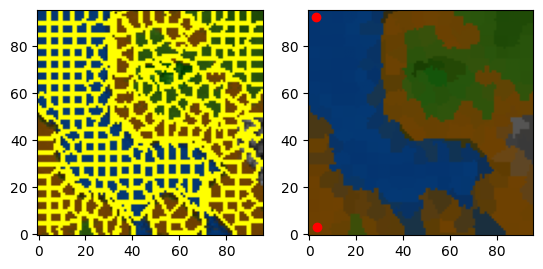

(46.73170731707317, 42.146341463414636)
(46.77777777777778, 17.037037037037038)
(47.3448275862069, 22.0)
(49.339622641509436, 28.660377358490567)
(48.81578947368421, 71.47368421052632)
(49.0, 47.65625)
(48.44444444444444, 64.27777777777777)
(48.088235294117645, 81.32352941176471)
(51.25714285714286, 6.085714285714285)
(51.791666666666664, 35.583333333333336)
(51.348837209302324, 57.72093023255814)
(52.484848484848484, 51.60606060606061)
(53.41509433962264, 74.73584905660377)
(51.2, 86.55)
(52.0, 12.0)
(52.0, 17.321428571428573)
(52.23529411764706, 24.41176470588235)
(53.58, 43.38)
(53.22222222222222, 66.86111111111111)
(54.04545454545455, 81.5)
(54.11363636363637, 92.72727272727273)
(55.935483870967744, 2.064516129032258)
(55.53333333333333, 61.86666666666667)
(56.6875, 87.25)
(56.67857142857143, 7.107142857142857)
(57.0, 21.862068965517242)
(59.054545454545455, 28.745454545454546)
(57.0, 12.0)
(57.0, 17.0)
(57.76923076923077, 36.82692307692308)
(60.61290322580645, 49.91935483870968)
(

/home/codespace/.python/current/lib/python3.10/site-packages/torch_geometric/utils/convert.py:249: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  data[key] = torch.tensor(value)


tensor([2.1154, 1.9231], dtype=torch.float64) tensor([0.]) tensor([108.3846,  65.6923,   1.6923], dtype=torch.float64)
tensor([42.1463, 46.7317], dtype=torch.float64) tensor([115.]) tensor([109.0244,  66.3415,   2.2927], dtype=torch.float64)
tensor([17.0370, 46.7778], dtype=torch.float64) tensor([116.]) tensor([  4.2963,  56.6296, 116.3704], dtype=torch.float64)
tensor([22.0000, 47.3448], dtype=torch.float64) tensor([117.]) tensor([  4.5862,  57.2759, 116.7241], dtype=torch.float64)
tensor([28.6604, 49.3396], dtype=torch.float64) tensor([118.]) tensor([10.0189, 51.4717, 99.4151], dtype=torch.float64)
tensor([71.4737, 48.8158], dtype=torch.float64) tensor([119.]) tensor([101.8421,  66.8421,   3.0526], dtype=torch.float64)
tensor([47.6562, 49.0000], dtype=torch.float64) tensor([120.]) tensor([103.5625,  66.2500,   2.7500], dtype=torch.float64)
tensor([64.2778, 48.4444], dtype=torch.float64) tensor([121.]) tensor([106.8889,  65.6667,   2.1111], dtype=torch.float64)
tensor([81.3235, 48.088

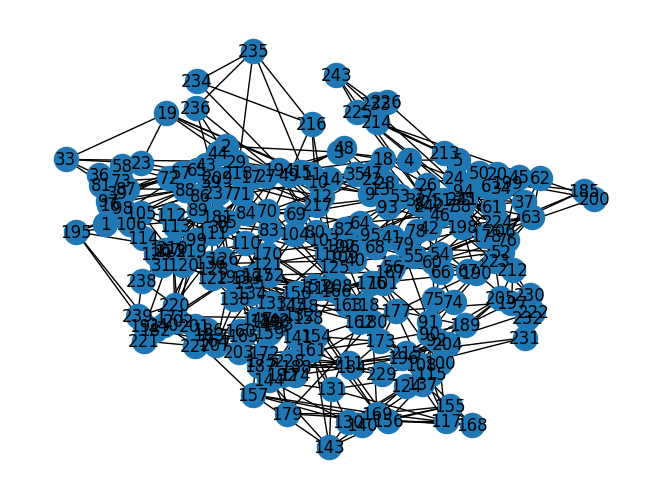

In [4]:


def convert_image_to_graph(image, num_segments, label, compactness=10, sigma=0.0,
                           weight_image=None):
    """
    We have an image of size 12x12. We want to convert this into a graph
    where the nodes are the pixels. The edges are the pixels that are adjacent
    to each other. 
    
    The attribute of each node is a 3 dimensional vector,
    which is the RGB value of the pixel.
    """
    #first we need to create the nodes
    #the nodes are the pixels in the image
    segments = slic(image, n_segments=num_segments, compactness=compactness,
                     sigma=sigma,
                    enforce_connectivity=True, )
    #this actually means that the centroids 
    new_image = np.zeros((96, 96, 3))

    unique_segments = np.unique(segments)
    for segment in unique_segments:
        indices = np.where(segments == segment)
        average_colour = np.mean(image[indices], axis=0)
        new_image[indices] = average_colour
    new_image = new_image / 255

    boundaries_test = find_boundaries(segments)
    boundaries = mark_boundaries(image, segments)

    #plot boundaries and new image side by side
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(boundaries, origin="lower")
    axs[1].imshow(new_image, origin="lower")
    #axs[1].scatter([92.5], [3], c="red")
    axs[1].scatter([3], [92.5], c="red")
    axs[1].scatter([3.5], [3], c="red")

    plt.show();
    rag = sk_graph.rag_mean_color(new_image, segments)
    regions = regionprops(segments)
    #plot the RAG graph
    nx.draw(rag, with_labels=True)
        
    i = 0
    for region in regions:
        #currently we get (y, x ), changing to be (x, y)
#        coords = region['centroid']

 #       region['centroid'] = (coords[1], coords[0])
  #      print(region["centroid"])
        rag.nodes[region['label']]['centroid'] = region['centroid'][::-1]
        if i > 114:
            print(region['centroid'])

        i += 1
    graph = nx.Graph(rag)

    #graph = nx.Graph(graph_two)
    #convert graph_three to pytorch geometric
    #convert the graph to a torch geometric data object
    data = pyg.utils.from_networkx(graph)
    data.pixel_count = data["pixel count"]
    data.mean_color = data["mean color"]
    data.total_color = data["total color"] 
    data.edge_attr = data.weight
    data.labels = data.labels - 1.0

    #for testing:
    for i in range(data.labels.shape[0]):
        if i > 114 or i == 0:
            print(data.centroid[i], data.labels[i], 255*data.mean_color[i])
    
    #We can flip this here if we want
    data.centroid = data.centroid[:, [0, 1]]
   
    #change the 0th and 1th component of data['centroid]
    #data.centroid = [data.centroid[:1], data.centroid[:0]]
    #centroid_is_path = path_to_graph(data["centroid"], label)
    #data["centroid_in_path"] = centroid_is_path
    region_bc = boundaries
    axs[1].scatter(92.5, 3, s=100)
    data.centroid_in_path_raw =  path_to_graph(data["centroid"], label)
    #data = path_to_graph_two(data, weight_image)
    return data, region_bc
    
data, bc = convert_image_to_graph(image, 400, label=label, compactness=10, sigma=0.0)

In [5]:
#for the custom weights of shortest_path used in dijkstra, I want to include the weight of current node
#and the weight of the next node
#I will include the weight of the next node as an edge attribute
#custom lookup function
    


In [6]:
def bilinear_interpolation(image, nodes):
    values = []
    height, width = image.shape
    
    for node in nodes:
        x, y = node
        
        i, j = int(x), int(y)
        alpha, beta = x - i, y - j
        
        if i < 0 or i >= height - 1 or j < 0 or j >= width - 1:
            values.append(np.nan)  # Node outside the image bounds
        else:
            interpolated_value = (1 - alpha) * (1 - beta) * image[i, j] + \
                                 alpha * (1 - beta) * image[i + 1, j] + \
                                 (1 - alpha) * beta * image[i, j + 1] + \
                                 alpha * beta * image[i + 1, j + 1]
            values.append(interpolated_value)
    
    return values
def path_to_graph_two(graph, weight_image):
    graph.centroid = graph.centroid/95
    graph.centroid = graph.centroid * 11
    temp = np.round(data.centroid.numpy()).astype(int)
    values = weight_image[temp[:, 0], temp[:, 1]]
    
    #values = bilinear_interpolation(weight_image, graph.centroid)
    data.centroid_values = torch.tensor(values)
    distances = torch.norm(graph.centroid, dim=1)
    #find the index of the maximum distance
    target = torch.argmax(distances).item()
    source = torch.argmin(distances).item()
    x = data.centroid_values
    graph.x = x
    nx_graph = pyg.utils.to_networkx(graph)
    def custom_lookup(starting_node, ending_node, edge_attr):
        result = graph.centroid_values[ending_node]
        return result
        # return 1 + graph.x[ending_node]
    path = nx.shortest_path(nx_graph, source=source, target=target, weight=custom_lookup)
    print(target, source)

    # path is a set of integers, we want to create a tensor
    #where the path is 1 and the rest is 0 of size target
    #create a tensor of size target
    path_tensor = torch.zeros(data.centroid.shape[0])
    #set the path nodes to 1
    path_tensor[path] = 1
    path_tensor.unsqueeze(0)
    data.centroid_in_path = path_tensor
    return data
data = path_to_graph_two(data, weights)

232 0


Weights: image of weights
graph: object

In [7]:
del data["pixel count"]
del data["total color"]


In [8]:
data

Data(edge_index=[2, 1448], labels=[243, 1], mean color=[243, 3], centroid=[243, 2], weight=[1448], num_nodes=243, pixel_count=[243], mean_color=[243, 3], total_color=[243, 3], edge_attr=[1448], centroid_in_path_raw=[243], centroid_values=[243], x=[243], centroid_in_path=[243])

In [9]:
# data.centroid = data.centroid/95
# data.centroid = data.centroid * 11

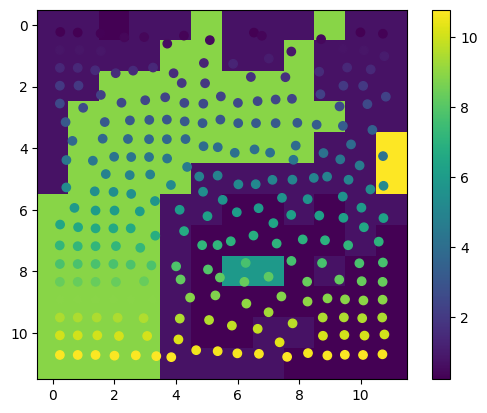

In [10]:
#plot the centroids
plt.imshow(weights, )

#plt.scatter(data.centroid[:, 0], data.centroid[:, 1])
#set the value displayed of centroid to be their y-coordinate
plt.scatter(data.centroid[:, 0], data.centroid[:, 1], c=data.centroid[:, 1])
plt.colorbar()

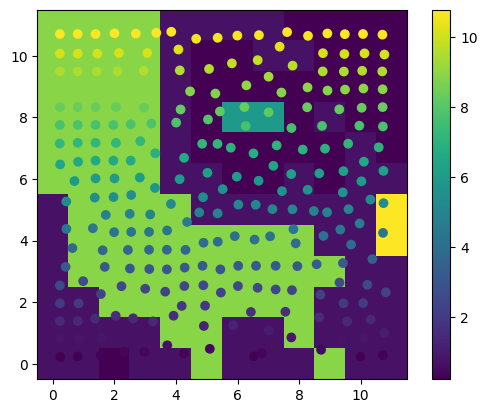

In [11]:
#plot the centroids
plt.imshow(weights, origin="lower" )

#plt.scatter(data.centroid[:, 0], data.centroid[:, 1])
#set the value displayed of centroid to be their y-coordinate
plt.scatter(data.centroid[:, 0], data.centroid[:, 1], c=data.centroid[:, 1],
            cmap="viridis")
plt.colorbar()

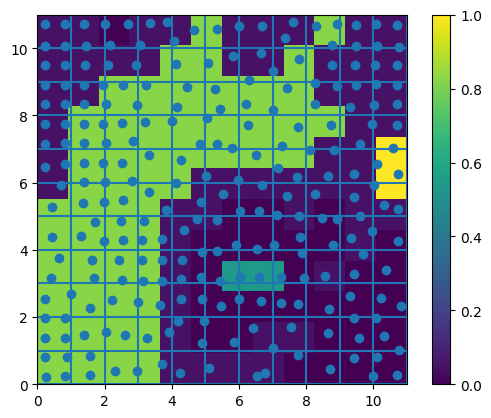

In [12]:
plt.imshow(weights, extent=[0, 11, 0, 11] )
#plot vertical and horizontal lines at every interval of 1
plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
plt.hlines(np.arange(0, 12), xmin=0, xmax=11)
plt.scatter(data.centroid[:, 0], data.centroid[:, 1],
            )
plt.colorbar()

In [13]:
#get the max and min of the weights
print(np.max(weights), np.min(weights))

9.2 0.8


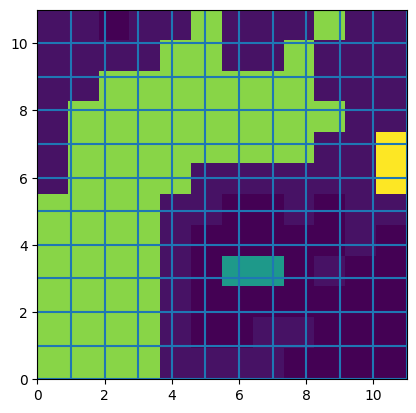

In [14]:
#find where each scatter point belongs to in the grid of image and then plot the weight
#of that point
plt.imshow(weights, extent=[0, 11, 0, 11] )
#plot vertical and horizontal lines at every interval of 1
plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
plt.hlines(np.arange(0, 12), xmin=0, xmax=11)


In [15]:
temp = np.round(data.centroid.numpy()).astype(int)
#temp[:, 1] = weights.shape[0] - 1 - temp[:, 1]
#rotate the temp_weights by 90 degrees
#flip the y-axis
#temp_weights = weights[weights.shape[0] - 1 - temp[:, 1], temp[:, 0]]


In [16]:
temp = np.round(data.centroid.numpy()).astype(int)

colors = weights[temp[:, 0], temp[:, 1]]

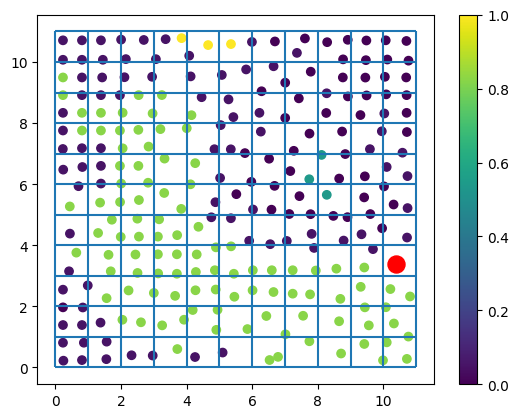

In [17]:
#plot the centroids with the weights as the color

#plt.imshow(weights, extent=[0, 11, 0, 11] )
#plot vertical and horizontal lines at every interval of 1

#plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
#plt.hlines(np.arange(0, 12), xmin=0, xmax=11)
plt.scatter(data.centroid[:, 0], data.centroid[:, 1],
            c=colors, cmap="viridis")
#flip the y-axis
#flip the y-axis
#plt.gca().invert_yaxis()
plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
plt.hlines(np.arange(0, 12), xmin=0, xmax=11)
#draw a x in node number 115
plt.scatter(data.centroid[72, 0], data.centroid[72, 1], c="red", s=150)
plt.colorbar()

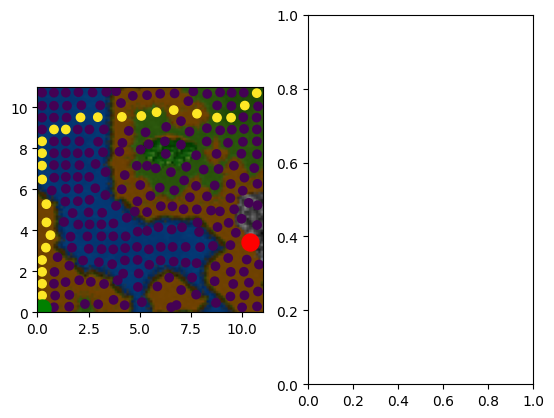

In [18]:
#shortest_path = path_to_graph_two(data, weights)
#plot the centroids with the weights as the color
#plt.imshow(weights, extent=[0, 11, 0, 11] )
fig, axs = plt.subplots(1,2)
axs[0].imshow(im, origin="lower", extent=[0, 11, 0, 11] )
axs[0].scatter(data.centroid[:, 0], data.centroid[:, 1], 
             c=data.centroid_in_path.numpy())
axs[0].scatter(data.centroid[72, 0], data.centroid[72, 1], c="red", s=150)
axs[0].scatter(data.centroid[0, 0], data.centroid[0, 1], c="green", s=150)


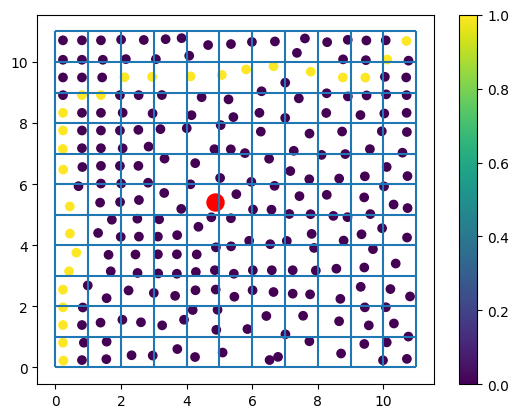

In [19]:
plt.scatter(data.centroid[:, 0], data.centroid[:, 1],
            c=data.centroid_in_path.numpy(), cmap="viridis")
plt.scatter(data.centroid[115, 0], data.centroid[115, 1], c="red", s=150)

#plot x and y lines at every interval
plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
plt.hlines(np.arange(0, 12), xmin=0, xmax=11)
plt.colorbar()
#flip the y-axis
#flip the y-axis
#plt.gca().invert_yaxis()
#plot the centroids with the weights as the color


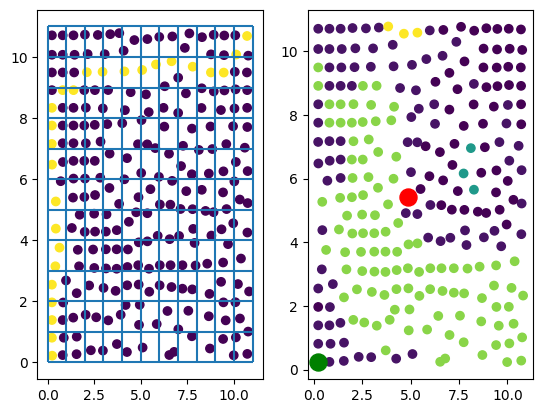

In [20]:
#plot side by side
fig, axs = plt.subplots(1,2)
axs[0].scatter(data.centroid[:, 0], data.centroid[:, 1], 
             c=data.centroid_in_path.numpy())
axs[0].vlines(np.arange(0, 12), ymin=0, ymax=11)
axs[0].hlines(np.arange(0, 12), xmin=0, xmax=11)
axs[1].scatter(data.centroid[:, 0], data.centroid[:, 1],
            c=colors, cmap="viridis")
axs[1].scatter(data.centroid[115, 0], data.centroid[115, 1], c="red", s=150)
axs[1].scatter(data.centroid[0, 0], data.centroid[0, 1], c="green", s=150)


[]

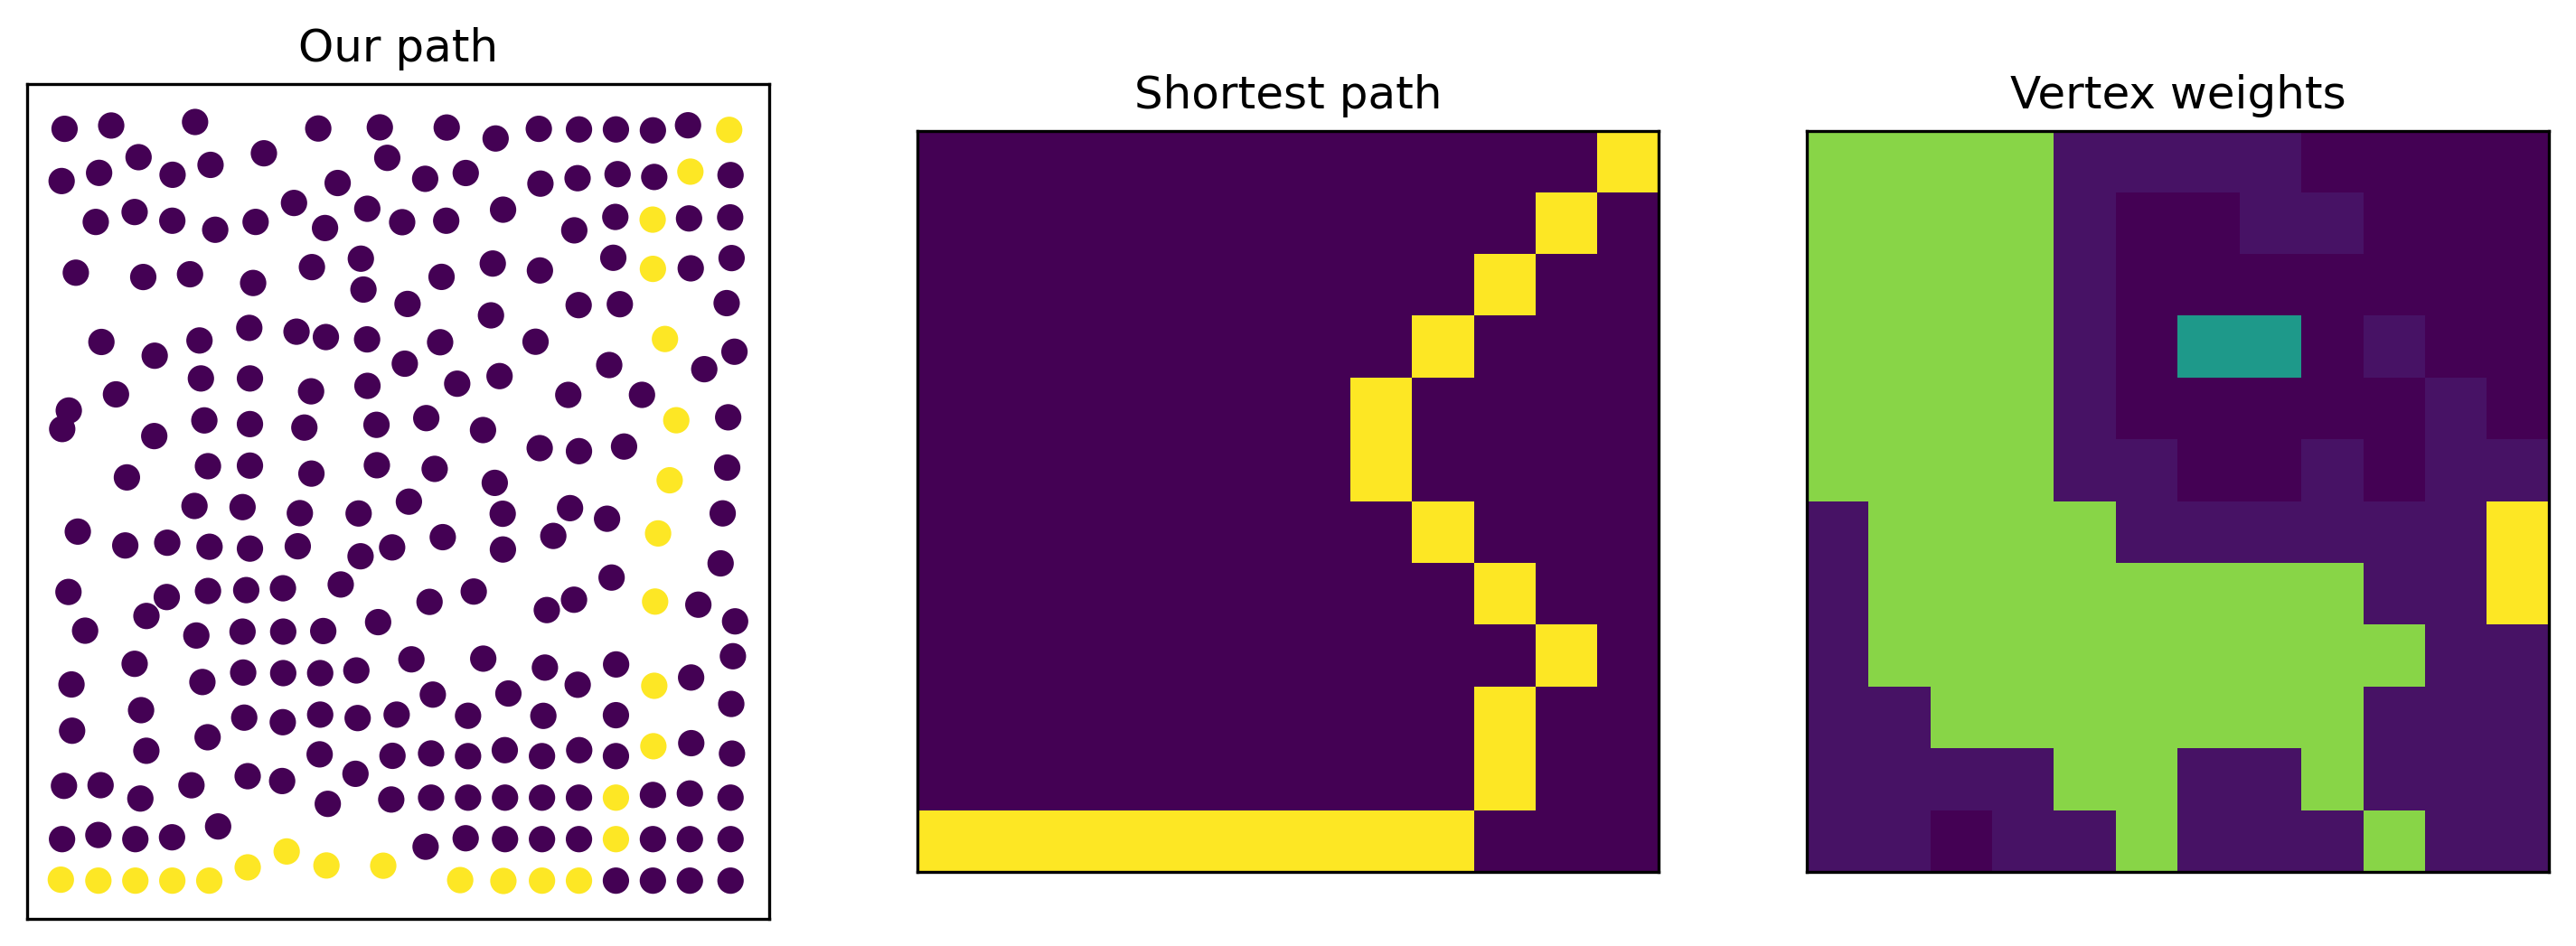

In [21]:
weights = train_weights[idx]
label = train_labels[idx]
label = train_labels[idx]

fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=300)

ax[0].scatter(data.centroid[:,  1], data.centroid[:, 0],
            c=data.centroid_in_path.numpy(), cmap="viridis")
#ax[0].invert_yaxis()
ax[0].set_title("Our path")
ax[1].imshow(label, origin="lower")
ax[1].set_title("Shortest path")
ax[2].set_title("Vertex weights")
ax[2].imshow(weights.astype(np.float32), origin="lower")

ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xticks([])

Text(0.5, 1.0, 'Raw path')

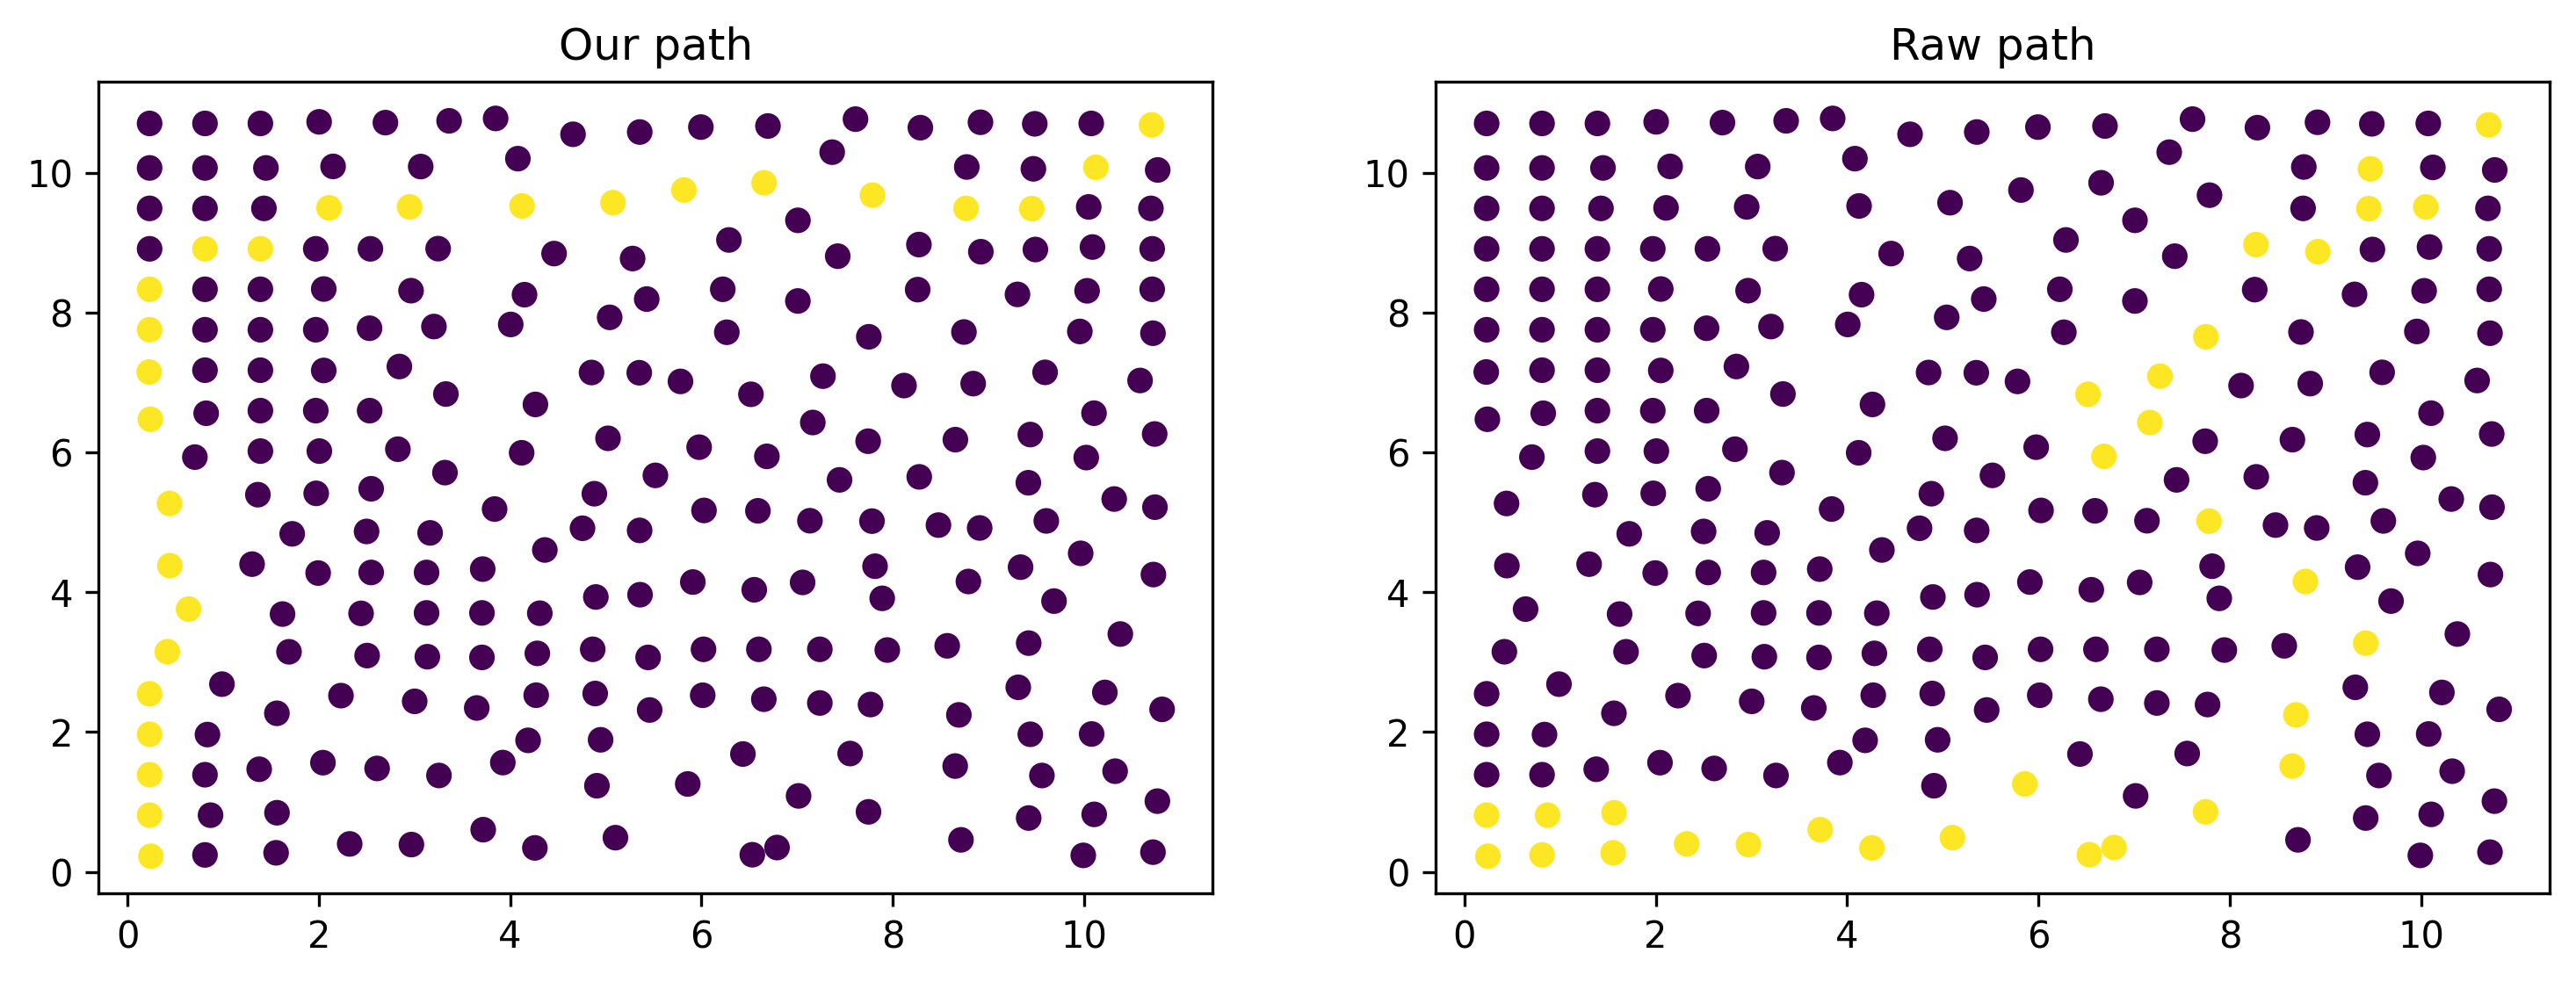

In [22]:
#plot the shortest path of our method and raw method side by sdie
fig, ax = plt.subplots(1,2, figsize=(12,4), dpi=300)

ax[0].scatter(data.centroid[:, 0], data.centroid[:, 1],
            c=data.centroid_in_path.numpy(), cmap="viridis")
#ax[0].invert_yaxis()
ax[0].set_title("Our path")

ax[1].scatter(data.centroid[:, 0], data.centroid[:, 1],
              c=data.centroid_in_path_raw.numpy(), cmap="viridis")
ax[1].set_title("Raw path")


#below each plot write the number of pixels in the path
#ax[0].text(0, -1, "Number of pixels in path: {}".format(int(torch.sum(data.centroid_in_path).item())))
#ax[1].text(0, -1, "Number of pixels in path: {}".format(int(torch.sum(data.centroid_in_path_raw).item())))


In [23]:
np.sum(label * weights)

27.7

In [24]:
print("Number of nodes in path: {}".format(int(torch.sum(data.centroid_in_path).item())))
print("Number of nodes in path: {}".format(int(torch.sum(data.centroid_in_path_raw).item())))

print("Weight of nodes in path: {}".format(torch.sum(data.centroid_in_path * data.centroid_values).item()))
print("Weight of nodes in path: {}".format(torch.sum(data.centroid_in_path_raw * data.centroid_values).item()))
print("Weight of image based path:", np.sum(label * weights))

Number of nodes in path: 26
Number of nodes in path: 31
Weight of nodes in path: 41.80078125
Weight of nodes in path: 84.7939453125
Weight of image based path: 27.7


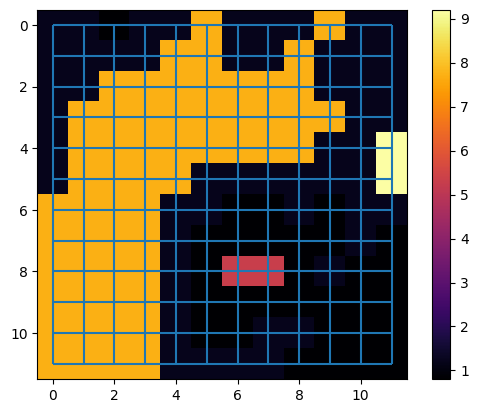

In [25]:
plt.imshow(weights,)
#plot vertical and horizontal lines at every interval of 1
plt.vlines(np.arange(0, 12), ymin=0, ymax=11)
plt.hlines(np.arange(0, 12), xmin=0, xmax=11)
plt.imshow(weights, cmap="inferno")

plt.colorbar()
#change the colormap to be something more visible


In [26]:
weights

array([[1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 1.2, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2, 7.7, 1.2, 1.2, 1.2],
       [1.2, 1.2, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 1.2, 1.2, 1.2],
       [1.2, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 1.2, 1.2],
       [1.2, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 1.2, 1.2, 9.2],
       [1.2, 7.7, 7.7, 7.7, 7.7, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 9.2],
       [7.7, 7.7, 7.7, 7.7, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 1.2, 1.2],
       [7.7, 7.7, 7.7, 7.7, 1.2, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 0.8],
       [7.7, 7.7, 7.7, 7.7, 1.2, 0.8, 5.3, 5.3, 0.8, 1.2, 0.8, 0.8],
       [7.7, 7.7, 7.7, 7.7, 1.2, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [7.7, 7.7, 7.7, 7.7, 1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8],
       [7.7, 7.7, 7.7, 7.7, 1.2, 1.2, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8]],
      dtype=float16)

In [ ]:
weights.shape

(12, 12)

In [ ]:
weights[0][0]

1.2

In [ ]:
our_path = data.centroid_in_path.numpy()
our_weight = np.sum(colors[our_path == 1])
our_weight

28.5